In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import classify
import mcc

In [3]:
import htwt
import iris

In [4]:
mvn = stats.multivariate_normal.rvs
y = 1.0 * np.random.choice(2, size = 200)
X = np.array([mvn([1, 1] if heads else [4, 4]) for heads in y])

In [5]:
X, y = htwt.get()

In [6]:
X, y = iris.get()

In [7]:
# murphy Ex 8.7, p 281
X = np.array([[2.2, 0.8], [2.6, 4.4], [1.4, 5.8], [2.4, 5.8], [3.4, 5.4], [3.4, 6.4],
    [5.5, 1.1], [5.6, 2.4], [5.5, 4.4], [6.4, 1.2], [6.4, 2.0], [7.8, 1.2], [7.6, 2.3]])
y = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype = float)

In [8]:
import nb
import lda
import qda
import rda
import nsc
import irls
import logistic
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid

In [9]:
clf = BernoulliNB()
clf = nb.bernoulli()
clf = GaussianNB()
clf = nb.gaussian()
clf = rda.Classifier()
clf = NearestCentroid()
clf = nsc.Classifier()
clf = LDA()
clf = lda.Classifier()
clf = qda.Classifier()
clf = QDA()
clf = irls.Classifier()
clf = LogisticRegression()
clf = logistic.Classifier()

In [14]:
reload(logistic)
clf = irls.Classifier()
clf = logistic.Classifier()

clf.fit(X, y)
print '%0.3f' % np.mean(np.mean(clf.predict(X) != y))

0.077


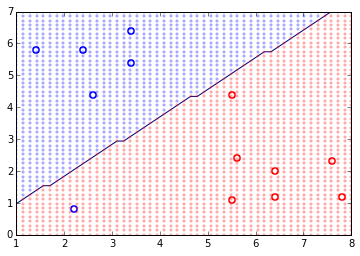

In [11]:
classify.show_points(X, y)
classify.show_regions(clf, X)
# classify.show_contour(clf, X)
plt.show()